# 코비 슛 성공 예측

### 데이터 로드

In [4]:
#https://www.kaggle.com/c/kobe-bryant-shot-selection/data
import pandas as pd

raw = pd.read_csv("data.csv")

In [5]:
raw.shape

(30697, 25)

In [6]:
raw.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


## 데이터 살펴보기

In [7]:
for col in raw.columns:
    print(col)

action_type
combined_shot_type
game_event_id
game_id
lat
loc_x
loc_y
lon
minutes_remaining
period
playoffs
season
seconds_remaining
shot_distance
shot_made_flag
shot_type
shot_zone_area
shot_zone_basic
shot_zone_range
team_id
team_name
game_date
matchup
opponent
shot_id


In [8]:
raw.shot_made_flag.head(10)
# shot_made_flag   1 or 0  분류 문제
# NaN 은 답을 알 수 없기에 제외 필요함

0    NaN
1    0.0
2    1.0
3    0.0
4    1.0
5    0.0
6    1.0
7    NaN
8    1.0
9    0.0
Name: shot_made_flag, dtype: float64

 - 데이터 제외하기: dropna  or isnull 활용

In [9]:
data = raw.dropna(axis = 0, subset = ['shot_made_flag'])      # 'shot_made_flag  에 Nan 값이 있을 경우 해당 row 를  drop하라

# .isnull 을 이용해서 동일하게 만들 수 있음
# data = raw[raw.shot_made_flg.isnull() == False]        

In [7]:
data.shape

(25697, 25)

In [8]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5
5,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6


###  action_shot 데이터 살펴보기

In [10]:
action_shots = []
for action in set(data.action_type):
    count_try = len(data[data.action_type == action])
    count_made = sum(data[data.action_type == action].shot_made_flag)
    made_percent = count_made / count_try
    action_shots.append((action, count_try, count_made, int(made_percent*1000)/10))

In [11]:
for shot in action_shots:
    print(shot)    # 슛 종류 , 슛 시도 횟수, 슛 성공횟수

('Fadeaway Jump Shot', 872, 501.0, 57.4)
('Turnaround Jump Shot', 891, 533.0, 59.8)
('Alley Oop Layup shot', 67, 48.0, 71.6)
('Driving Floating Bank Jump Shot', 1, 1.0, 100.0)
('Turnaround Finger Roll Shot', 2, 2.0, 100.0)
('Driving Bank shot', 3, 2.0, 66.6)
('Running Bank shot', 43, 36.0, 83.7)
('Cutting Layup Shot', 6, 4.0, 66.6)
('Driving Hook Shot', 13, 8.0, 61.5)
('Running Finger Roll Layup Shot', 5, 3.0, 60.0)
('Follow Up Dunk Shot', 10, 9.0, 90.0)
('Turnaround Hook Shot', 8, 4.0, 50.0)
('Jump Bank Shot', 289, 224.0, 77.5)
('Pullup Jump shot', 402, 291.0, 72.3)
('Driving Slam Dunk Shot', 43, 42.0, 97.6)
('Reverse Slam Dunk Shot', 15, 15.0, 100.0)
('Finger Roll Layup Shot', 28, 23.0, 82.1)
('Step Back Jump shot', 106, 67.0, 63.2)
('Running Tip Shot', 1, 0.0, 0.0)
('Driving Reverse Layup Shot', 83, 62.0, 74.6)
('Layup Shot', 2154, 830.0, 38.5)
('Fadeaway Bank shot', 27, 24.0, 88.8)
('Running Layup Shot', 51, 36.0, 70.5)
('Jump Shot', 15836, 5177.0, 32.6)
('Putback Dunk Shot', 3, 2.

In [12]:
# # 성공률 순으로 살펴보기

# def cal_shot_success(x):
#     if x[2] == 0:
#         return 0
#     else:
#         return x[2]/x[1]
    

action_shots.sort(key = lambda x: x[3], reverse=True)     # 슛 성공횟수 많은 순으로 정렬


# # action_shots.sort(key = lambda x: x[1]/x[2], reverse=True)  # 슛 성공률 높은 순으로 정렬  0 이 나올 경우 계산 X
# action_shots.sort(key = lambda x: cal_shot_success(x), reverse=True)

In [13]:
for shot in action_shots:
    print(shot)    # 슛 종류 , 슛 시도 횟수, 슛 성공횟수

('Driving Floating Bank Jump Shot', 1, 1.0, 100.0)
('Turnaround Finger Roll Shot', 2, 2.0, 100.0)
('Reverse Slam Dunk Shot', 15, 15.0, 100.0)
('Running Slam Dunk Shot', 1, 1.0, 100.0)
('Hook Bank Shot', 5, 5.0, 100.0)
('Slam Dunk Shot', 334, 328.0, 98.2)
('Driving Slam Dunk Shot', 43, 42.0, 97.6)
('Driving Dunk Shot', 257, 251.0, 97.6)
('Alley Oop Dunk Shot', 95, 90.0, 94.7)
('Reverse Dunk Shot', 61, 56.0, 91.8)
('Follow Up Dunk Shot', 10, 9.0, 90.0)
('Fadeaway Bank shot', 27, 24.0, 88.8)
('Running Dunk Shot', 18, 16.0, 88.8)
('Driving Finger Roll Layup Shot', 59, 52.0, 88.1)
('Running Hook Shot', 33, 29.0, 87.8)
('Driving Finger Roll Shot', 68, 58.0, 85.2)
('Running Bank shot', 43, 36.0, 83.7)
('Finger Roll Layup Shot', 28, 23.0, 82.1)
('Turnaround Bank shot', 58, 46.0, 79.3)
('Dunk Shot', 217, 169.0, 77.8)
('Jump Bank Shot', 289, 224.0, 77.5)
('Running Jump Shot', 779, 582.0, 74.7)
('Driving Reverse Layup Shot', 83, 62.0, 74.6)
('Driving Layup Shot', 1628, 1207.0, 74.1)
('Jump Hook S

In [14]:
data_action_type = pd.DataFrame(action_shots, columns = ['action_type', 'try','made', 'per'])

In [15]:
data_action_type.head()

,action_type,try,made,per
0,Driving Floating Bank Jump Shot,1,1.0,100.0
1,Turnaround Finger Roll Shot,2,2.0,100.0
2,Reverse Slam Dunk Shot,15,15.0,100.0
3,Running Slam Dunk Shot,1,1.0,100.0
4,Hook Bank Shot,5,5.0,100.0


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

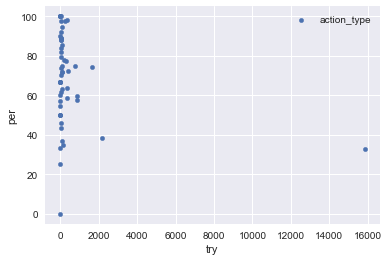

In [17]:
data_action_type.plot(kind = 'scatter', x='try', y = 'per', label = 'action_type')

In [18]:
import seaborn as sns

In [ ]:
sns.barplot(data = data_action_type, x='action_type', y = 'per', hue = 'action_type')